In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
pd.set_option('display.max_columns', None) #settings to display all the columns

## Reading in the data

In [3]:
datasets_path = './project_dataset'

datasets = os.listdir(datasets_path)

datasets

# listing datasets inside the datsets folder

['extract - cash request - data analyst.csv',
 'extract - fees - data analyst - .csv',
 'Lexique - Data Analyst.xlsx']

In [4]:
# imports all all available datasets into a dictionary

df_dict = {}

for dataset in datasets:
    # if condition to read in both excel & csv
    if dataset.split('.')[-1] == 'csv':
        dataset_path = os.path.join(datasets_path, dataset)
        df_dict[dataset] = pd.read_csv(dataset_path)
    else:
        dataset_path = os.path.join(datasets_path, dataset)
        df_dict[dataset] = pd.read_excel(dataset_path)

In [5]:
list(df_dict.keys())

# checking the keys to conform files were read in correctly

['extract - cash request - data analyst.csv',
 'extract - fees - data analyst - .csv',
 'Lexique - Data Analyst.xlsx']

In [6]:
rename_map = {
    'extract - cash request - data analyst.csv' : 'cash request',
    'extract - fees - data analyst - .csv' : 'fees',
    'Lexique - Data Analyst.xlsx' : 'lexique'
}

In [7]:
for old_key, new_key in rename_map.items():
    df_dict[new_key] = df_dict.pop(old_key)

# replacing the long keys with shoeter ones

In [8]:
df_dict.keys() # df keys are shortened

dict_keys(['cash request', 'fees', 'lexique'])

## Initial Cash Request Exploration

In [9]:
df_dict['cash request'].head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [10]:
df_dict['cash request'].tail()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00,2021-02-06 20:17:49.292493+00,13681.0,NaN,NaN,2021-02-06 11:00:00+00,2020-10-13,2021-02-06 20:17:49.257521+00,instant,2020-10-12 13:54:24.352856+00,NaN,NaN,NaN
23966,25243,50.0,money_back,2020-10-27 14:41:25.73491+00,2020-12-18 13:15:40.843946+00,NaN,NaN,30367.0,2020-11-03 22:00:00+00,2020-10-28,2020-12-01 13:26:53.787672+00,instant,2020-10-27 14:41:57.901946+00,completed,2020-11-12 23:20:41.928788+00,2020-12-01 13:26:53.815504+00
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,2021-02-05 12:19:30.626289+00,instant,2020-10-20 07:58:14.171553+00,NaN,NaN,NaN
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,2021-02-05 13:14:19.689906+00,instant,2020-10-10 05:41:23.368363+00,NaN,NaN,NaN
23969,19886,100.0,direct_debit_sent,2020-10-08 14:16:52.155661+00,2021-01-05 15:45:52.645536+00,44867.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-10,NaN,instant,2020-10-08 14:17:04.526139+00,NaN,NaN,NaN


In [11]:
df_dict['cash request'].info()

# ids are floats not int
# date columns are not date time 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [12]:
df_dict['cash request'].isna().sum()

# key issue - missing user id
# other values missing might be expected

id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                        2103
moderated_at                   7935
deleted_account_id            21866
reimbursement_date                0
cash_request_received_date     7681
money_back_date                7427
transfer_type                     0
send_at                        7329
recovery_status               20640
reco_creation                 20640
reco_last_update              20640
dtype: int64

In [13]:
print('Duplicated rows in df as a whole')
print(f'{df_dict['cash request'].duplicated().sum()}')
print() # short line brake
print('Duplicated rows per column')
for col in ['id', 'user_id']:
    print(f'{col}: {df_dict['cash request'][col].duplicated().sum()}')

Duplicated rows in df as a whole
0

Duplicated rows per column
id: 0
user_id: 13171


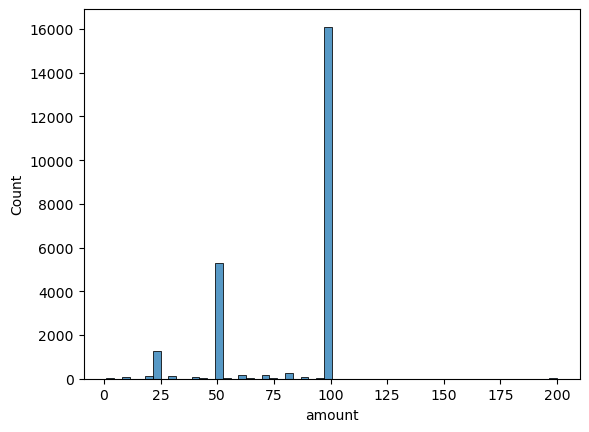

In [14]:
sns.histplot(df_dict['cash request']['amount'])
plt.show()

# 100, 50 and 25 are the most common cash request amounts respectivaely

## Cash request Data CLeaning

In [15]:
df_dict['cash request'].head(3)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [16]:
df_dict['cash request'].columns

Index(['id', 'amount', 'status', 'created_at', 'updated_at', 'user_id',
       'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update'],
      dtype='object')

In [17]:
col_dates = ['created_at', 'updated_at', 'moderated_at', 'reimbursement_date', 
            'cash_request_received_date', 'money_back_date', 'send_at',
            'reco_creation', 'reco_last_update'] # selecting only date time related columns

for col in col_dates:
    df_dict['cash request'][col] = pd.to_datetime(df_dict['cash request'][col], errors='coerce')

In [18]:
df_dict['cash request'].dtypes # dates casted

id                                          int64
amount                                    float64
status                                     object
created_at                    datetime64[ns, UTC]
updated_at                    datetime64[ns, UTC]
user_id                                   float64
moderated_at                  datetime64[ns, UTC]
deleted_account_id                        float64
reimbursement_date            datetime64[ns, UTC]
cash_request_received_date         datetime64[ns]
money_back_date               datetime64[ns, UTC]
transfer_type                              object
send_at                       datetime64[ns, UTC]
recovery_status                            object
reco_creation                 datetime64[ns, UTC]
reco_last_update              datetime64[ns, UTC]
dtype: object

In [19]:
# cast ids to int

for col in ['id', 'user_id', 'deleted_account_id']:
    df_dict['cash request'][col] = df_dict['cash request'][col].astype('Int64') # regular int cannot store NaN & Int64 can

In [20]:
df_dict['cash request'].dtypes 
#ids casted

id                                          Int64
amount                                    float64
status                                     object
created_at                    datetime64[ns, UTC]
updated_at                    datetime64[ns, UTC]
user_id                                     Int64
moderated_at                  datetime64[ns, UTC]
deleted_account_id                          Int64
reimbursement_date            datetime64[ns, UTC]
cash_request_received_date         datetime64[ns]
money_back_date               datetime64[ns, UTC]
transfer_type                              object
send_at                       datetime64[ns, UTC]
recovery_status                            object
reco_creation                 datetime64[ns, UTC]
reco_last_update              datetime64[ns, UTC]
dtype: object

In [21]:
df_dict['cash request']['created_at'].describe()

# data time frame: 2019-11-19 - 2020-11-01

count                                  23970
mean     2020-08-18 01:09:13.882328576+00:00
min         2019-11-19 13:57:53.511561+00:00
25%      2020-07-10 06:58:41.013899008+00:00
50%      2020-09-02 10:43:39.634614528+00:00
75%      2020-10-12 13:14:42.661127168+00:00
max         2020-11-01 23:42:30.847066+00:00
Name: created_at, dtype: object

In [22]:
df_dict['cash request'] \
    .loc[df_dict['cash request']['user_id'].isna(), ['user_id', 'deleted_account_id']] \
    .isna() \
    .sum()

# whenever uer_id is missing, deleted account id is present

user_id               2103
deleted_account_id       0
dtype: int64

In [23]:
df_dict['cash request']['any_user_id'] = \
    df_dict['cash request']['user_id'] \
        .fillna(df_dict['cash request']['deleted_account_id'])

# creating any id column with deleted_account_id if user id is missing

In [24]:
df_dict['cash request'].sample(5)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,any_user_id
14445,16550,50.0,money_back,2020-09-17 08:18:47.645414+00:00,2020-12-18 13:10:10.894653+00:00,16254,2020-09-17 08:58:53.163289+00:00,<NA>,NaT,2020-09-18,2020-11-06 19:22:12.619781+00:00,instant,2020-09-24 08:18:47.598189+00:00,NaN,NaT,NaT,16254
6643,16017,50.0,rejected,2020-09-14 08:23:30.907060+00:00,2020-09-14 10:34:48.475711+00:00,41226,2020-09-14 10:34:48.458844+00:00,<NA>,NaT,NaT,NaT,regular,2020-09-21 08:23:30.861390+00:00,NaN,NaT,NaT,41226
10557,16290,100.0,money_back,2020-09-15 17:57:48.134213+00:00,2020-12-18 13:08:48.467007+00:00,37024,2020-09-16 07:48:45.385290+00:00,<NA>,NaT,2020-09-18,2020-10-03 19:15:24.957014+00:00,instant,2020-09-22 17:57:48.094241+00:00,NaN,NaT,NaT,37024
17287,11133,50.0,money_back,2020-08-06 12:12:29.252692+00:00,2020-12-18 13:11:14.418937+00:00,3046,2020-08-06 13:35:47.533342+00:00,<NA>,2020-09-13 06:00:22.060000+00:00,2020-08-08,2020-10-06 06:15:55.819045+00:00,instant,2020-08-13 12:12:29.252261+00:00,completed,2020-09-23 22:26:50.142912+00:00,2020-10-06 06:15:55.833428+00:00,3046
9032,25879,50.0,money_back,2020-10-28 23:42:40.986300+00:00,2021-02-05 09:12:51.601391+00:00,86449,NaT,<NA>,NaT,2020-10-30,2021-02-05 09:12:51.554014+00:00,instant,2020-10-28 23:43:29.428213+00:00,completed,2021-01-29 22:35:35.760234+00:00,2021-02-05 09:12:51.557356+00:00,86449


In [25]:
df_dict['cash request']['any_user_id'].isna().sum()

np.int64(0)

## Cash request - identify the cohorts

In [26]:
df_dict['cash request']['any_user_id'].nunique()

# total number of unique users

11793

In [27]:
cohort_df = df_dict['cash request'] \
    .groupby('any_user_id') \
    .agg({'created_at' : 'min'}) \
    .sort_values('created_at') 

In [28]:
cohort_df.shape

(11793, 1)

In [29]:
cohort_df.head()

,created_at
any_user_id,
47,2019-11-19 13:57:53.511561+00:00
1309,2019-12-09 14:47:35.190714+00:00
804,2019-12-10 19:05:21.596873+00:00
812,2019-12-10 19:05:48.921042+00:00
191,2019-12-10 19:13:35.825460+00:00


In [30]:
cohort_df = cohort_df \
    .assign(cohort = cohort_df['created_at'].dt.to_period('M')) \
    .drop(columns = 'created_at') \
    .reset_index()

/var/folders/jz/0vythxt91879l4fs8bggj2zw0000gn/T/ipykernel_17975/3268727358.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  .assign(cohort = cohort_df['created_at'].dt.to_period('M')) \


In [31]:
cohort_df.head()

,any_user_id,cohort
0,47,2019-11
1,1309,2019-12
2,804,2019-12
3,812,2019-12
4,191,2019-12


## Cohort Intel

In [32]:
cohort_df_uu = cohort_df \
    .groupby('cohort') \
    .agg({'any_user_id' : 'count'}) \
    .reset_index() \

# unique user count by cohort (cohort df contains unique values only)

In [33]:
cohort_df_uu

,cohort,any_user_id
0,2019-11,1
1,2019-12,254
2,2020-01,106
3,2020-02,90
4,2020-03,86
5,2020-04,246
6,2020-05,432
7,2020-06,1540
8,2020-07,1482
9,2020-08,728


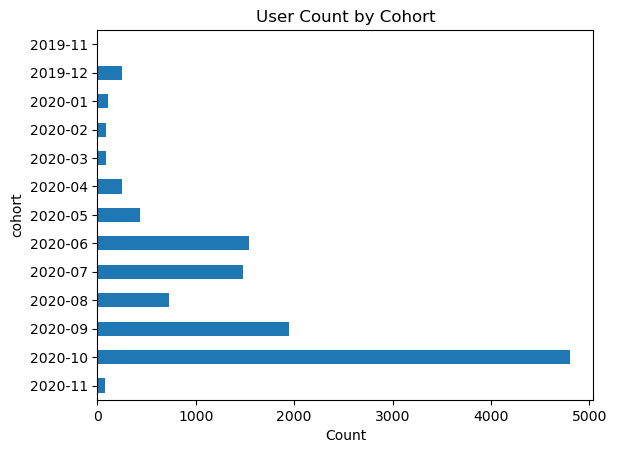

In [34]:
cohort_df_uu.sort_values('cohort', ascending=False, inplace=True)

cohort_df_uu.plot.barh(
    x='cohort' , 
    y='any_user_id',
    title = 'User Count by Cohort',
    legend=False,
    xlabel='Count')

plt.show()

In [35]:
# add cohort column to cash_request

df_dict['cash request'] = pd.merge(
    left=df_dict['cash request'],
    right=cohort_df,
    on='any_user_id',
    how='left'
)

In [36]:
# transaction count per cohort

cohort_tr_count = df_dict['cash request'] \
    .value_counts('cohort') \
    .to_frame() \
    .sort_index() \
    .reset_index()

In [37]:
cohort_tr_count

,cohort,count
0,2019-11,8
1,2019-12,1080
2,2020-01,354
3,2020-02,441
4,2020-03,371
5,2020-04,952
6,2020-05,1660
7,2020-06,5266
8,2020-07,4147
9,2020-08,1632


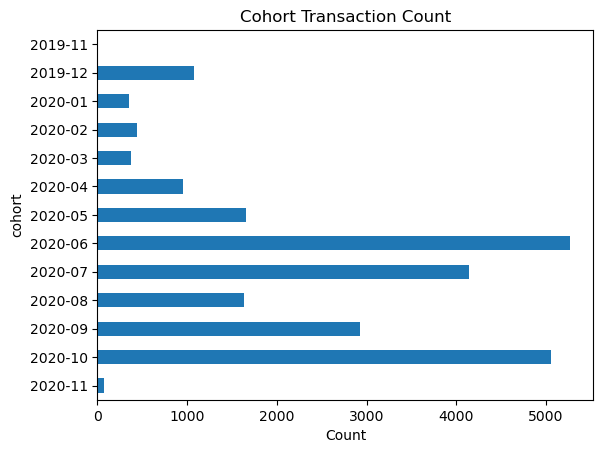

In [38]:
cohort_tr_count.sort_values('cohort', ascending=False, inplace=True)  

cohort_tr_count.plot.barh(
        x='cohort', 
        y='count',
        title='Cohort Transaction Count',
        xlabel='Count',
        legend=False);

In [39]:
cohort_avg_tr_pu = pd.merge(
    left=cohort_tr_count,
    right=cohort_df_uu,
    on='cohort',
    how='inner'
).rename(columns = {'count' : 'Transactions', 'any_user_id' : 'Users'})

cohort_avg_tr_pu = cohort_avg_tr_pu \
    .sort_values('cohort') \
    .assign(
        avg_tr_pu = round(cohort_avg_tr_pu['Transactions'] / cohort_avg_tr_pu['Users'], 2))

cohort_avg_tr_pu = cohort_avg_tr_pu.rename(columns={
    'cohort': 'Cohort',
    'avg_tr_pu': 'AVG Transactions / User'
})

cohort_avg_tr_pu

,Cohort,Transactions,Users,AVG Transactions / User
12,2019-11,8,1,8.0
11,2019-12,1080,254,4.25
10,2020-01,354,106,3.34
9,2020-02,441,90,4.9
8,2020-03,371,86,4.31
7,2020-04,952,246,3.87
6,2020-05,1660,432,3.84
5,2020-06,5266,1540,3.42
4,2020-07,4147,1482,2.8
3,2020-08,1632,728,2.24


<Axes: title={'center': 'Repeated Users per Cohort'}, xlabel='Cohort', ylabel='Users with > 1 request'>

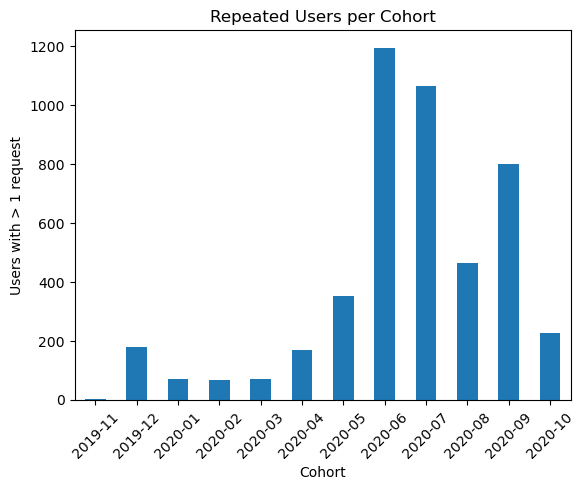

In [94]:
# requests per user per cohort (overall count)
user_request_counts = df_dict['cash request'] \
    .groupby(['any_user_id', 'cohort']) \
    .size() \
    .reset_index(name='request_count')

# keep repeat users
repeat_users = user_request_counts.query('request_count > 1')

# count repeat users per cohort
repeat_users_per_cohort = repeat_users['cohort'].value_counts().sort_index()

repeat_users_per_cohort.plot.bar(
    title='Repeated Users per Cohort',
    xlabel='Cohort',
    ylabel='Users with > 1 request',
    rot=45
)

/var/folders/jz/0vythxt91879l4fs8bggj2zw0000gn/T/ipykernel_17975/3531337793.py:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  .dt.to_period('M') \


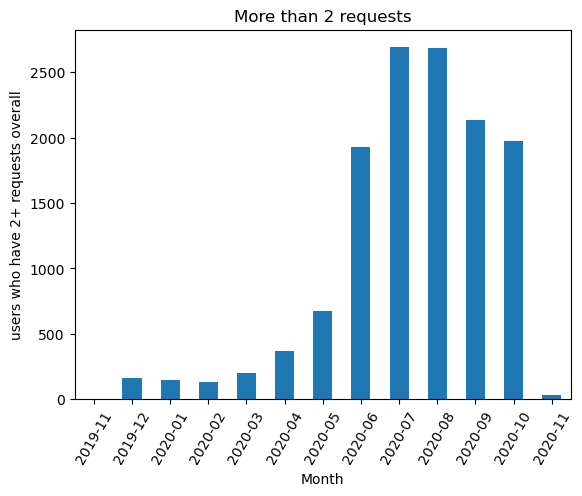

In [95]:
# months where users had > 2 requests

# all users with more than 2 requests in total 
users_3plus = user_request_counts.query('request_count > 2')['any_user_id']

# how many of those requests happened in each month
months_3plus = df_dict['cash request'] \
    .loc[df_dict['cash request']['any_user_id'].isin(users_3plus), 'created_at'] \
    .dt.to_period('M') \
    .value_counts() \
    .sort_index()

months_3plus.plot.bar(
    title='More than 2 requests',
    xlabel='Month',
    ylabel='users who have 2+ requests overall',
    rot=60
)
plt.show()

/var/folders/jz/0vythxt91879l4fs8bggj2zw0000gn/T/ipykernel_17975/3603325723.py:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  .assign(month=df_cash['created_at'].dt.to_period('M'))


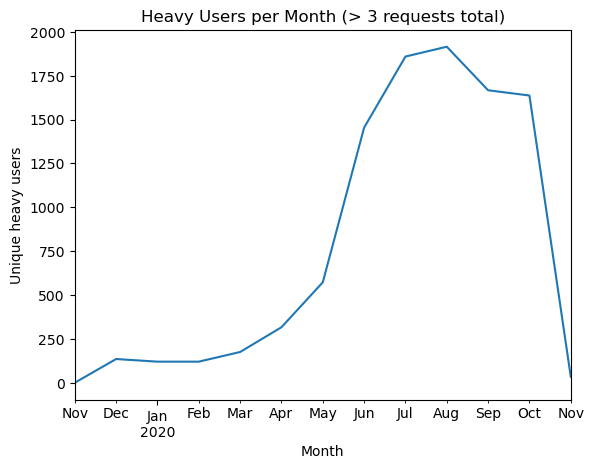

In [96]:
def heavy_users_per_month(df_cash, min_requests=3):
    # users with >= min_requests overall
    user_counts = df_cash.groupby('any_user_id').size()
    heavy_users = user_counts[user_counts >= min_requests].index

    # count unique heavy users per month
    return (
        df_cash.loc[df_cash['any_user_id'].isin(heavy_users)]
        .assign(month=df_cash['created_at'].dt.to_period('M'))
        .groupby('month')['any_user_id']
        .nunique()
        .sort_index()
    )

# usage
heavy_by_month = heavy_users_per_month(df_dict['cash request'], min_requests=3)
heavy_by_month.plot(
    title='Heavy Users per Month (> 3 requests total)',
    xlabel='Month',
    ylabel='Unique heavy users'
)
plt.show()

In [40]:
# transaction count per month

tr_count_month = df_dict['cash request'] \
    .groupby(df_dict['cash request']['created_at'].dt.to_period('M')) \
    .agg({'id' : 'count'}) \
    .reset_index()

/var/folders/jz/0vythxt91879l4fs8bggj2zw0000gn/T/ipykernel_17975/500815559.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  .groupby(df_dict['cash request']['created_at'].dt.to_period('M')) \


In [41]:
tr_count_month

,created_at,id
0,2019-11,1
1,2019-12,289
2,2020-01,223
3,2020-02,184
4,2020-03,244
5,2020-04,473
6,2020-05,837
7,2020-06,2615
8,2020-07,3601
9,2020-08,3417


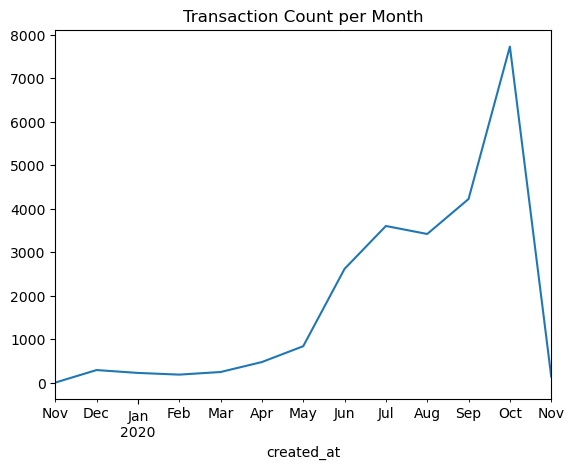

In [42]:
tr_count_month.plot(
    x='created_at', 
    y='id',
    legend=False,
    title='Transaction Count per Month');

In [43]:
tr_growth_rate_month = tr_count_month \
    .assign(
        tr_growth_rate = (tr_count_month['id'] - tr_count_month['id'].shift(1)) / tr_count_month['id'].shift(1)
    )

In [44]:
tr_growth_rate_month 

,created_at,id,tr_growth_rate
0,2019-11,1,<NA>
1,2019-12,289,288.0
2,2020-01,223,-0.228374
3,2020-02,184,-0.174888
4,2020-03,244,0.326087
5,2020-04,473,0.938525
6,2020-05,837,0.769556
7,2020-06,2615,2.124253
8,2020-07,3601,0.377055
9,2020-08,3417,-0.051097


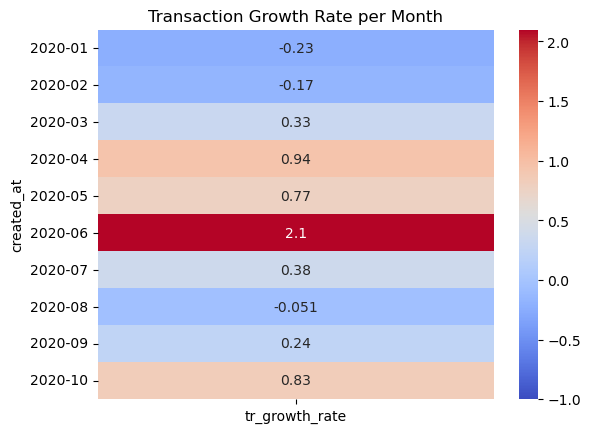

In [45]:
sns.heatmap(
    tr_growth_rate_month[['tr_growth_rate', 'created_at',]].set_index('created_at').query('created_at.between("2020-01", "2020-10")'),
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=2.1
)

plt.title("Transaction Growth Rate per Month");

## Fees exploration

In [46]:
df_dict['fees'].sample(3)

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
6990,16678,23771.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23771,2020-10-23 18:52:28.374478+00,2020-10-23 18:52:28.374506+00,2020-11-06 20:30:03.38332+00,NaN,NaN,after
7339,5479,11475.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 11475,2020-08-30 17:04:47.103197+00,2020-10-13 14:25:17.324651+00,NaN,2020-09-04 22:00:00+00,2020-09-28 22:00:00+00,after
5343,4811,13564.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 13564,2020-08-22 14:53:06.763354+00,2020-10-13 14:25:10.03098+00,2020-11-30 12:26:36.24046+00,NaN,NaN,after


In [47]:
print(df_dict['fees'].duplicated().sum())
print()
for col in ['id', 'cash_request_id']:
    print(f'{col}: {df_dict['fees'][col].duplicated().sum()}')

0

id: 0
cash_request_id: 8127


In [48]:
df_dict['fees'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [49]:
df_dict['fees']['status'].unique()

# accpeted - payments to calculate the revenue
# confirmed - not an incident but also not revenue
# cancalled & rejected - incidents

array(['rejected', 'accepted', 'cancelled', 'confirmed'], dtype=object)

In [50]:
df_dict['fees'].isna().sum()

id                     0
cash_request_id        4
type                   0
status                 0
category           18865
total_amount           0
reason                 0
created_at             0
updated_at             0
paid_at             5530
from_date          13295
to_date            13295
charge_moment          0
dtype: int64

In [51]:
df_dict['fees']['type'].unique()

# use type column to identify incidents, always filled in

array(['instant_payment', 'incident', 'postpone'], dtype=object)

In [52]:
# Notes
# sum the amounts for accepted transactions to get total revenue.
# incident if status in fees == rejected or cancelled

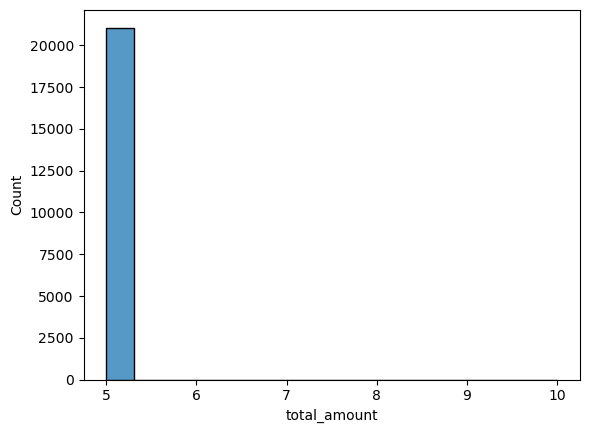

In [53]:
sns.histplot(df_dict['fees']['total_amount']);

# mostly 5 euro fees

In [54]:
df_dict['fees']['status'].value_counts()

status
accepted     14841
cancelled     4938
rejected      1194
confirmed       88
Name: count, dtype: int64

## Fees Data Cleaning

In [55]:
df_dict['fees'].columns

Index(['id', 'cash_request_id', 'type', 'status', 'category', 'total_amount',
       'reason', 'created_at', 'updated_at', 'paid_at', 'from_date', 'to_date',
       'charge_moment'],
      dtype='object')

In [56]:
for col in ['created_at', 'updated_at', 'paid_at', 'from_date', 'to_date']:
    df_dict['fees'][col] = pd.to_datetime(df_dict['fees'][col], errors='coerce')

In [57]:
df_dict['fees'].dtypes

id                               int64
cash_request_id                float64
type                            object
status                          object
category                        object
total_amount                   float64
reason                          object
created_at         datetime64[ns, UTC]
updated_at         datetime64[ns, UTC]
paid_at            datetime64[ns, UTC]
from_date          datetime64[ns, UTC]
to_date            datetime64[ns, UTC]
charge_moment                   object
dtype: object

In [58]:
df_dict['fees']['cash_request_id'] = df_dict['fees']['cash_request_id'].astype('Int64')

## Merge fees and part of the cash request

In [59]:
df_dict['fees'].head(3)

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.423150+00:00,2020-10-13 14:25:09.396112+00:00,2020-12-17 14:50:07.470110+00:00,NaT,NaT,after
1,6961,11714,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00:00,2020-10-13 14:25:15.537063+00:00,2020-12-08 17:13:10.459080+00:00,NaT,NaT,after
2,16296,23371,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00:00,2020-10-23 10:10:58.352994+00:00,2020-11-04 19:34:37.432910+00:00,NaT,NaT,after


In [60]:
df_dict['cash request'][['id', 'cohort']]

,id,cohort
0,5,2019-12
1,70,2019-12
2,7,2019-12
3,10,2019-12
4,1594,2020-05
...,...,...
23965,20616,2020-06
23966,25243,2020-10
23967,22357,2020-10
23968,20256,2020-10


In [61]:
fees_by_cohort = pd.merge(
    left = df_dict['fees'],
    right = df_dict['cash request'][['id', 'cohort']],
    left_on = 'cash_request_id',
    right_on = 'id',
    how = 'left'
) \
    .drop(columns = ['id_y']) \
    .rename(columns = {'id_x' : 'id'})

In [62]:
fees_by_cohort.head(3)

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment,cohort
0,6537,14941,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.423150+00:00,2020-10-13 14:25:09.396112+00:00,2020-12-17 14:50:07.470110+00:00,NaT,NaT,after,2020-09
1,6961,11714,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00:00,2020-10-13 14:25:15.537063+00:00,2020-12-08 17:13:10.459080+00:00,NaT,NaT,after,2020-06
2,16296,23371,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00:00,2020-10-23 10:10:58.352994+00:00,2020-11-04 19:34:37.432910+00:00,NaT,NaT,after,2020-10


## Revenue

In [63]:
revenue_df = \
    fees_by_cohort \
        .query('status == "accepted"')

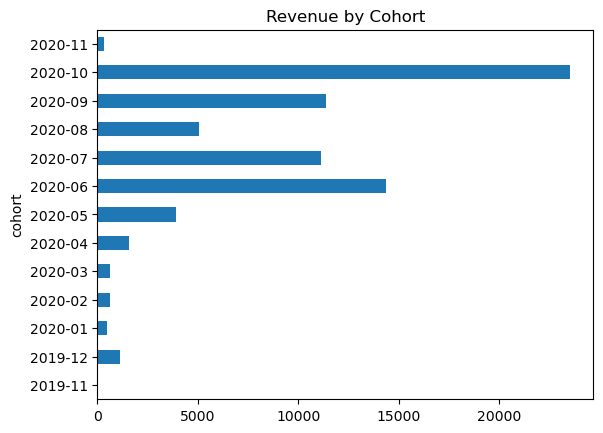

In [64]:
revenue_df \
    .groupby('cohort') \
    .agg({'total_amount' : 'sum'}) \
    .plot.barh(
        legend=False,
        title='Revenue by Cohort');

In [65]:
revenue_df.isna().sum()

# paid at is missing in 396 cases

id                     0
cash_request_id        0
type                   0
status                 0
category           13281
total_amount           0
reason                 0
created_at             0
updated_at             0
paid_at              396
from_date          12288
to_date            12329
charge_moment          0
cohort                 0
dtype: int64

In [66]:
avg_time_to_pay = (revenue_df['paid_at'] - revenue_df['created_at']).mean()
avg_time_to_pay

Timedelta('24 days 11:02:15.772419588')

In [67]:
revenue_df['paid_at'] = revenue_df['paid_at'].fillna(revenue_df['created_at'] + avg_time_to_pay)

# fill in paid at missing values with avg time to pay

/var/folders/jz/0vythxt91879l4fs8bggj2zw0000gn/T/ipykernel_17975/3983987446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_df['paid_at'] = revenue_df['paid_at'].fillna(revenue_df['created_at'] + avg_time_to_pay)


In [68]:
revenue_df.isna().sum()

id                     0
cash_request_id        0
type                   0
status                 0
category           13281
total_amount           0
reason                 0
created_at             0
updated_at             0
paid_at                0
from_date          12288
to_date            12329
charge_moment          0
cohort                 0
dtype: int64

/var/folders/jz/0vythxt91879l4fs8bggj2zw0000gn/T/ipykernel_17975/1621793852.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  .groupby(revenue_df['paid_at'].dt.to_period('M')) \


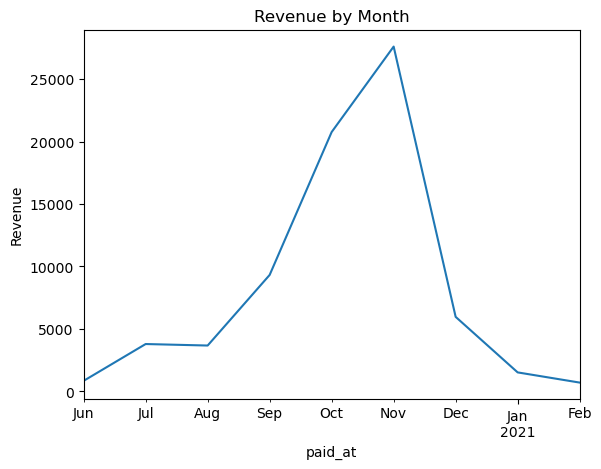

In [69]:
revenue_df \
    .groupby(revenue_df['paid_at'].dt.to_period('M')) \
    .agg({'total_amount' : 'sum'}) \
    .sort_index() \
    .plot(
        legend=False,
        title='Revenue by Month',
        ylabel='Revenue'
    );

In [70]:
fees_by_cohort['status'].unique()

array(['rejected', 'accepted', 'cancelled', 'confirmed'], dtype=object)

In [71]:
incidents_per_cohort = fees_by_cohort \
    .query('status in ["rejected", "cancelled"]') \
    .groupby('cohort') \
    .agg({'status' : 'count'}) \
    .reset_index() \
    .rename(columns = {'status' : 'incidents_count'})

In [72]:
incidents_per_cohort

,cohort,incidents_count
0,2019-11,4
1,2019-12,84
2,2020-01,39
3,2020-02,65
4,2020-03,44
5,2020-04,196
6,2020-05,396
7,2020-06,1605
8,2020-07,1195
9,2020-08,409


In [73]:
fees_attemps = fees_by_cohort \
    .groupby('cohort') \
    .agg({'status' : 'count'}) \
    .reset_index() \
    .rename(columns = {'status' : 'fees_attemps_count'})

In [74]:
incident_rate = pd.merge(
    left=fees_attemps,
    right=incidents_per_cohort,
    on='cohort',
    how='left'
)

incident_rate = incident_rate.assign(
    incident_rate = incident_rate['incidents_count'] / incident_rate['fees_attemps_count']
)

In [75]:
incident_rate

,cohort,fees_attemps_count,incidents_count,incident_rate
0,2019-11,10,4,0.400000
1,2019-12,311,84,0.270096
2,2020-01,131,39,0.297710
3,2020-02,193,65,0.336788
4,2020-03,174,44,0.252874
5,2020-04,513,196,0.382066
6,2020-05,1186,396,0.333895
7,2020-06,4499,1605,0.356746
8,2020-07,3435,1195,0.347889
9,2020-08,1419,409,0.288231


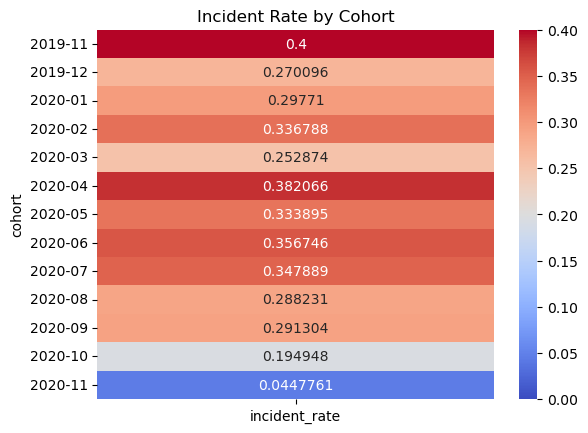

In [76]:
sns.heatmap(
    incident_rate[['cohort', 'incident_rate']].set_index('cohort'),
    annot=True,
    fmt='g',
    cmap='coolwarm',
    vmin=0,
    vmax=0.4
)

plt.title('Incident Rate by Cohort');

Aditional Measurs 

In [77]:
# Cohort-level revenue
# --------------------------------------------------

revenue_by_cohort = (
    revenue_df
    .groupby('cohort', as_index=False)
    .agg({'total_amount': 'sum'})
)

# Active users per cohort
# --------------------------------------------------

active_users_by_cohort = (
    df_dict['cash request']
    .groupby('cohort')['any_user_id']
    .nunique()
    .reset_index(name='active_users')
)

# Revenue per Active User (RPAU)
# --------------------------------------------------

rpau_df = (
    revenue_by_cohort
    .merge(active_users_by_cohort, on='cohort', how='left')
)

rpau_df['revenue_per_active_user'] = (
    rpau_df['total_amount'] / rpau_df['active_users']
)


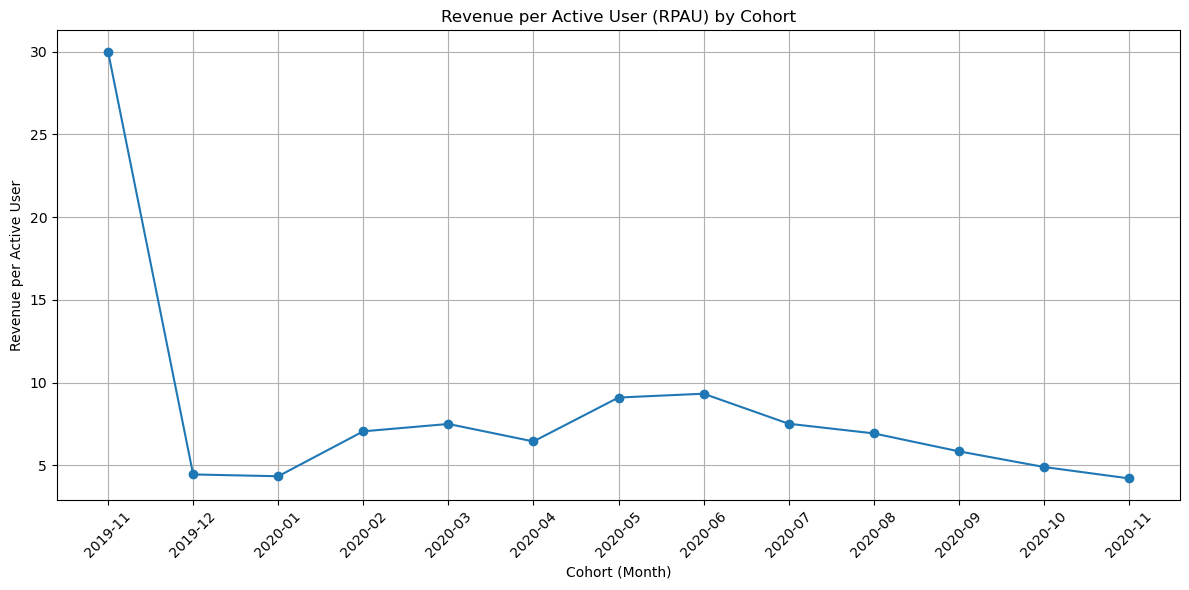

In [78]:

# Revenue per Active User (RPAU) by Cohort


plt.figure(figsize=(12, 6))

plt.plot(
    rpau_df['cohort'].astype(str),
    rpau_df['revenue_per_active_user'],
    marker='o'
)

plt.title('Revenue per Active User (RPAU) by Cohort')
plt.xlabel('Cohort (Month)')
plt.ylabel('Revenue per Active User')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


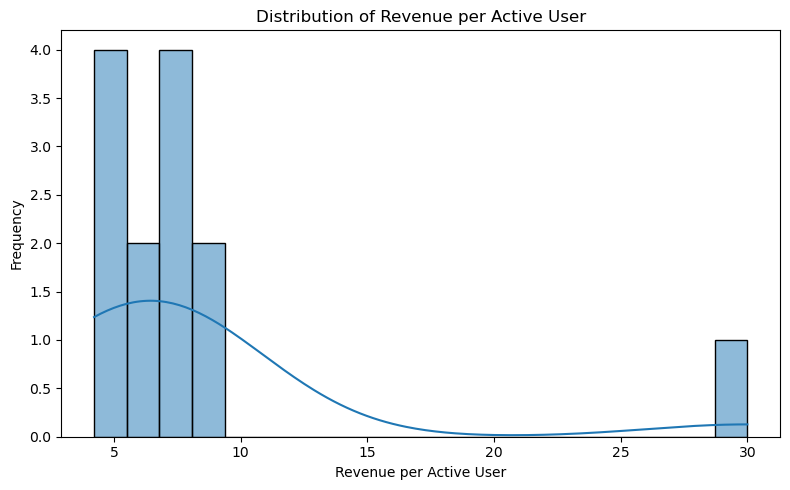

In [79]:
# Distribution of RPAU


plt.figure(figsize=(8, 5))

sns.histplot(
    rpau_df['revenue_per_active_user'],
    bins=20,
    kde=True
)

plt.title('Distribution of Revenue per Active User')
plt.xlabel('Revenue per Active User')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [80]:
# Repeat Usage Rate
# Percentage of users in each cohort who made
# two or more cash requests.

# Number of cash requests per user per cohort
requests_per_user = (
    df_dict['cash request']
    .groupby(['cohort', 'any_user_id'])
    .size()
    .reset_index(name='n_requests')
)

# Users with at least 2 requests
repeat_users = requests_per_user[
    requests_per_user['n_requests'] >= 2
]



In [81]:
# Repeat usage rate per cohort
repeat_usage_rate_df = (
    requests_per_user
    .groupby('cohort')['any_user_id']
    .nunique()
    .reset_index(name='total_users')
    .merge(
        repeat_users
        .groupby('cohort')['any_user_id']
        .nunique()
        .reset_index(name='repeat_users'),
        on='cohort',
        how='left'
    )
)


repeat_usage_rate_df['repeat_users'] = (
    repeat_usage_rate_df['repeat_users'].fillna(0)
)

repeat_usage_rate_df['repeat_usage_rate'] = (
    repeat_usage_rate_df['repeat_users']
    / repeat_usage_rate_df['total_users']
)

In [82]:
repeat_usage_rate_df.head()


,cohort,total_users,repeat_users,repeat_usage_rate
0,2019-11,1,1.0,1.000000
1,2019-12,254,179.0,0.704724
2,2020-01,106,69.0,0.650943
3,2020-02,90,67.0,0.744444
4,2020-03,86,69.0,0.802326


In [83]:
repeat_usage_rate_df.dtypes

cohort               period[M]
total_users              int64
repeat_users           float64
repeat_usage_rate      float64
dtype: object

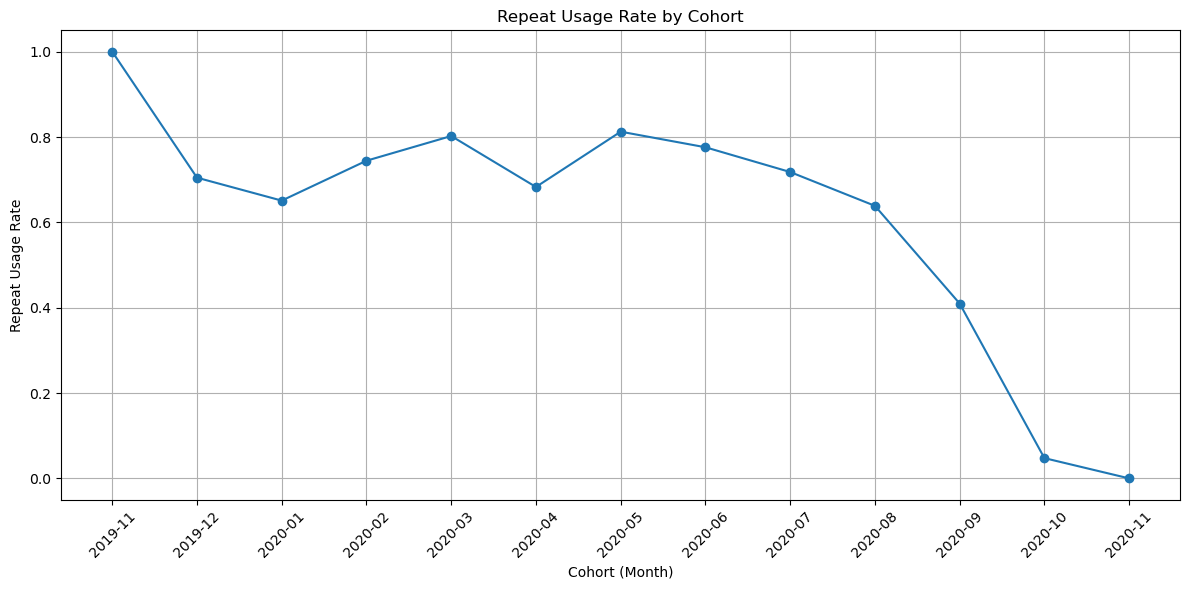

In [84]:
# Repeat Usage Rate by Cohort


plt.figure(figsize=(12, 6))

plt.plot(
    repeat_usage_rate_df['cohort'].astype(str),
    repeat_usage_rate_df['repeat_usage_rate'],
    marker='o'
)

plt.title('Repeat Usage Rate by Cohort')
plt.xlabel('Cohort (Month)')
plt.ylabel('Repeat Usage Rate')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

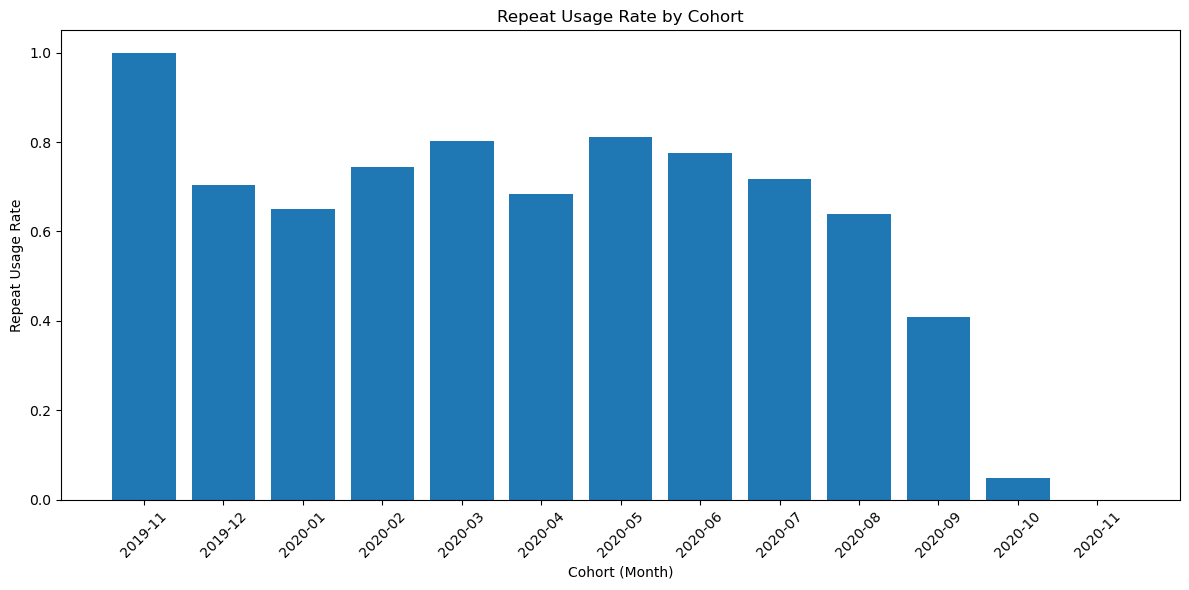

In [85]:
# Repeat Usage Rate by Cohort (Bar Plot)


plt.figure(figsize=(12, 6))

plt.bar(
    repeat_usage_rate_df['cohort'].astype(str),
    repeat_usage_rate_df['repeat_usage_rate']
)

plt.title('Repeat Usage Rate by Cohort')
plt.xlabel('Cohort (Month)')
plt.ylabel('Repeat Usage Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [86]:

# Cohort Active User Ratio
# Ratio of currently active users to the initial
# number of users in the cohort.
# cohort user engagement over time.

initial_cohort_size = (
    df_dict['cash request']
    .groupby('cohort')['any_user_id']
    .nunique()
    .reset_index(name='initial_users')
)

cohort_active_user_ratio_df = (
    active_users_by_cohort
    .merge(initial_cohort_size, on='cohort', how='left')
)

cohort_active_user_ratio_df['active_user_ratio'] = (
    cohort_active_user_ratio_df['active_users']
    / cohort_active_user_ratio_df['initial_users']
)


In [87]:
cohort_active_user_ratio_df.head()

,cohort,active_users,initial_users,active_user_ratio
0,2019-11,1,1,1.0
1,2019-12,254,254,1.0
2,2020-01,106,106,1.0
3,2020-02,90,90,1.0
4,2020-03,86,86,1.0


In [88]:
cohort_active_user_ratio_df.dtypes

cohort               period[M]
active_users             int64
initial_users            int64
active_user_ratio      float64
dtype: object

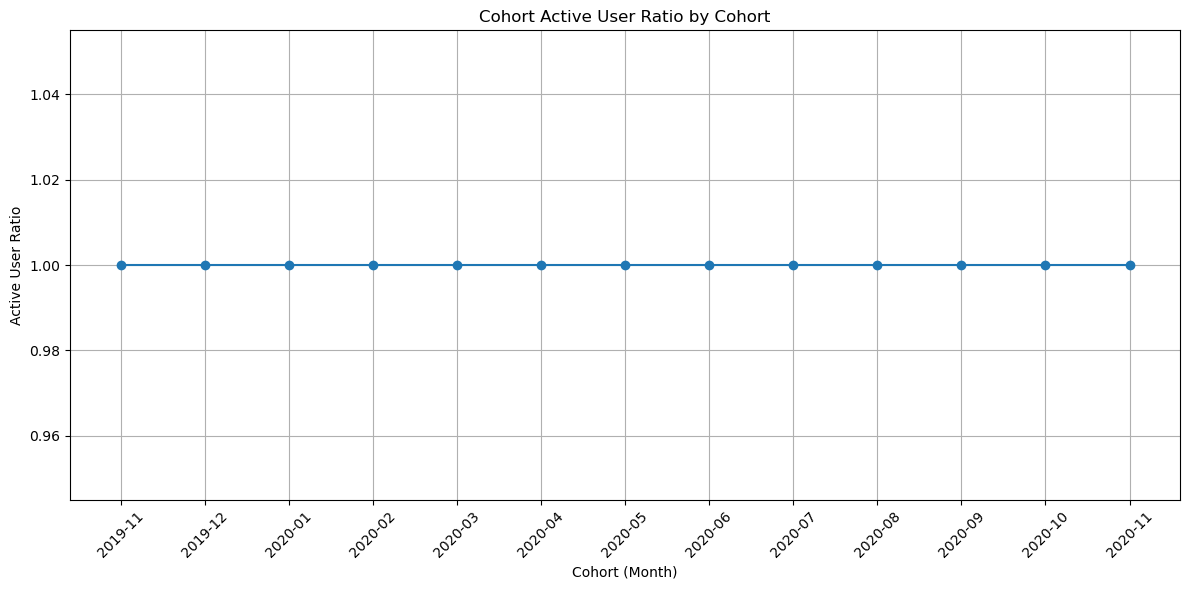

In [89]:

# Cohort Active User Ratio by Cohort

plt.figure(figsize=(12, 6))

plt.plot(
    cohort_active_user_ratio_df['cohort'].astype(str),
    cohort_active_user_ratio_df['active_user_ratio'],
    marker='o'
)

plt.title('Cohort Active User Ratio by Cohort')
plt.xlabel('Cohort (Month)')
plt.ylabel('Active User Ratio')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


In [90]:
# Incident-Adjusted Revenue.
# Revenue adjusted by payment incident rate to reflect the revenue quality instead of the volume

incident_adjusted_revenue_df = (
    revenue_by_cohort
    .merge(incident_rate, on='cohort', how='left')
)

# Replace missing incident rates with 0 (no incidents)
incident_adjusted_revenue_df['incident_rate'] = (
    incident_adjusted_revenue_df['incident_rate'].fillna(0)
)

incident_adjusted_revenue_df['incident_adjusted_revenue'] = (
    incident_adjusted_revenue_df['total_amount']
    * (1 - incident_adjusted_revenue_df['incident_rate'])
)

In [91]:
incident_adjusted_revenue_df.head()

,cohort,total_amount,fees_attemps_count,incidents_count,incident_rate,incident_adjusted_revenue
0,2019-11,30.0,10,4,0.400000,18.000000
1,2019-12,1130.0,311,84,0.270096,824.790997
2,2020-01,460.0,131,39,0.297710,323.053435
3,2020-02,635.0,193,65,0.336788,421.139896
4,2020-03,645.0,174,44,0.252874,481.896552


In [92]:
incident_adjusted_revenue_df.dtypes

cohort                       period[M]
total_amount                   float64
fees_attemps_count               int64
incidents_count                  int64
incident_rate                  float64
incident_adjusted_revenue      float64
dtype: object

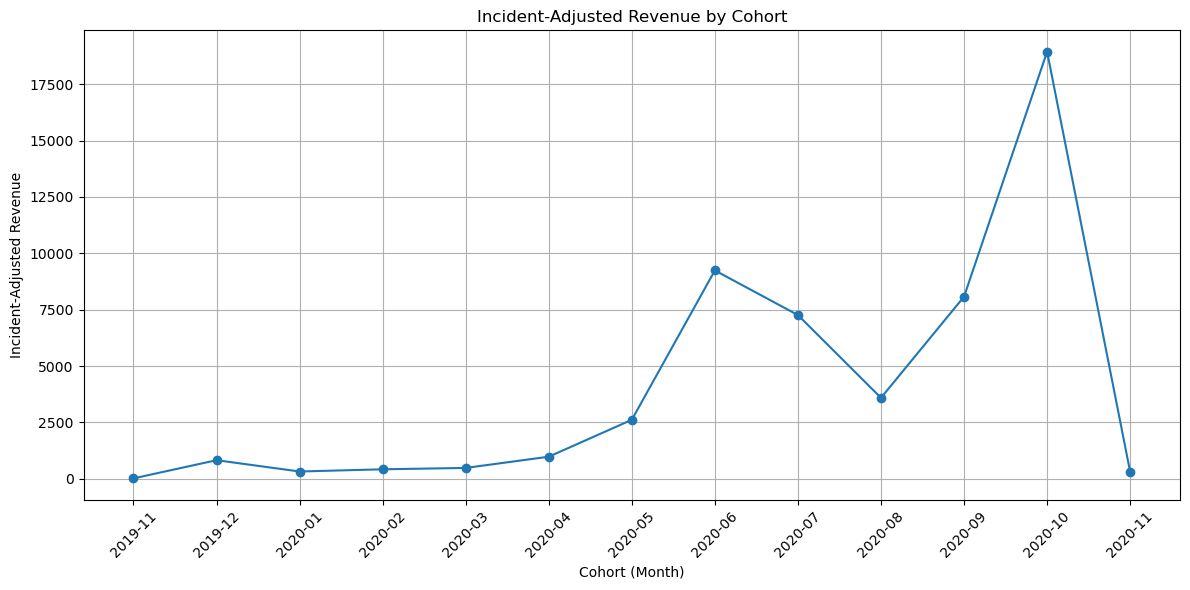

In [93]:

# Incident-Adjusted Revenue by Cohort


plt.figure(figsize=(12, 6))

plt.plot(
    incident_adjusted_revenue_df['cohort'].astype(str),
    incident_adjusted_revenue_df['incident_adjusted_revenue'],
    marker='o'
)

plt.title('Incident-Adjusted Revenue by Cohort')
plt.xlabel('Cohort (Month)')
plt.ylabel('Incident-Adjusted Revenue')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()